In [1]:
import pandas as pd

data = pd.read_csv('ionosphere.csv', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [3]:
data[34].value_counts()

34
g    225
b    126
Name: count, dtype: int64

In [4]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

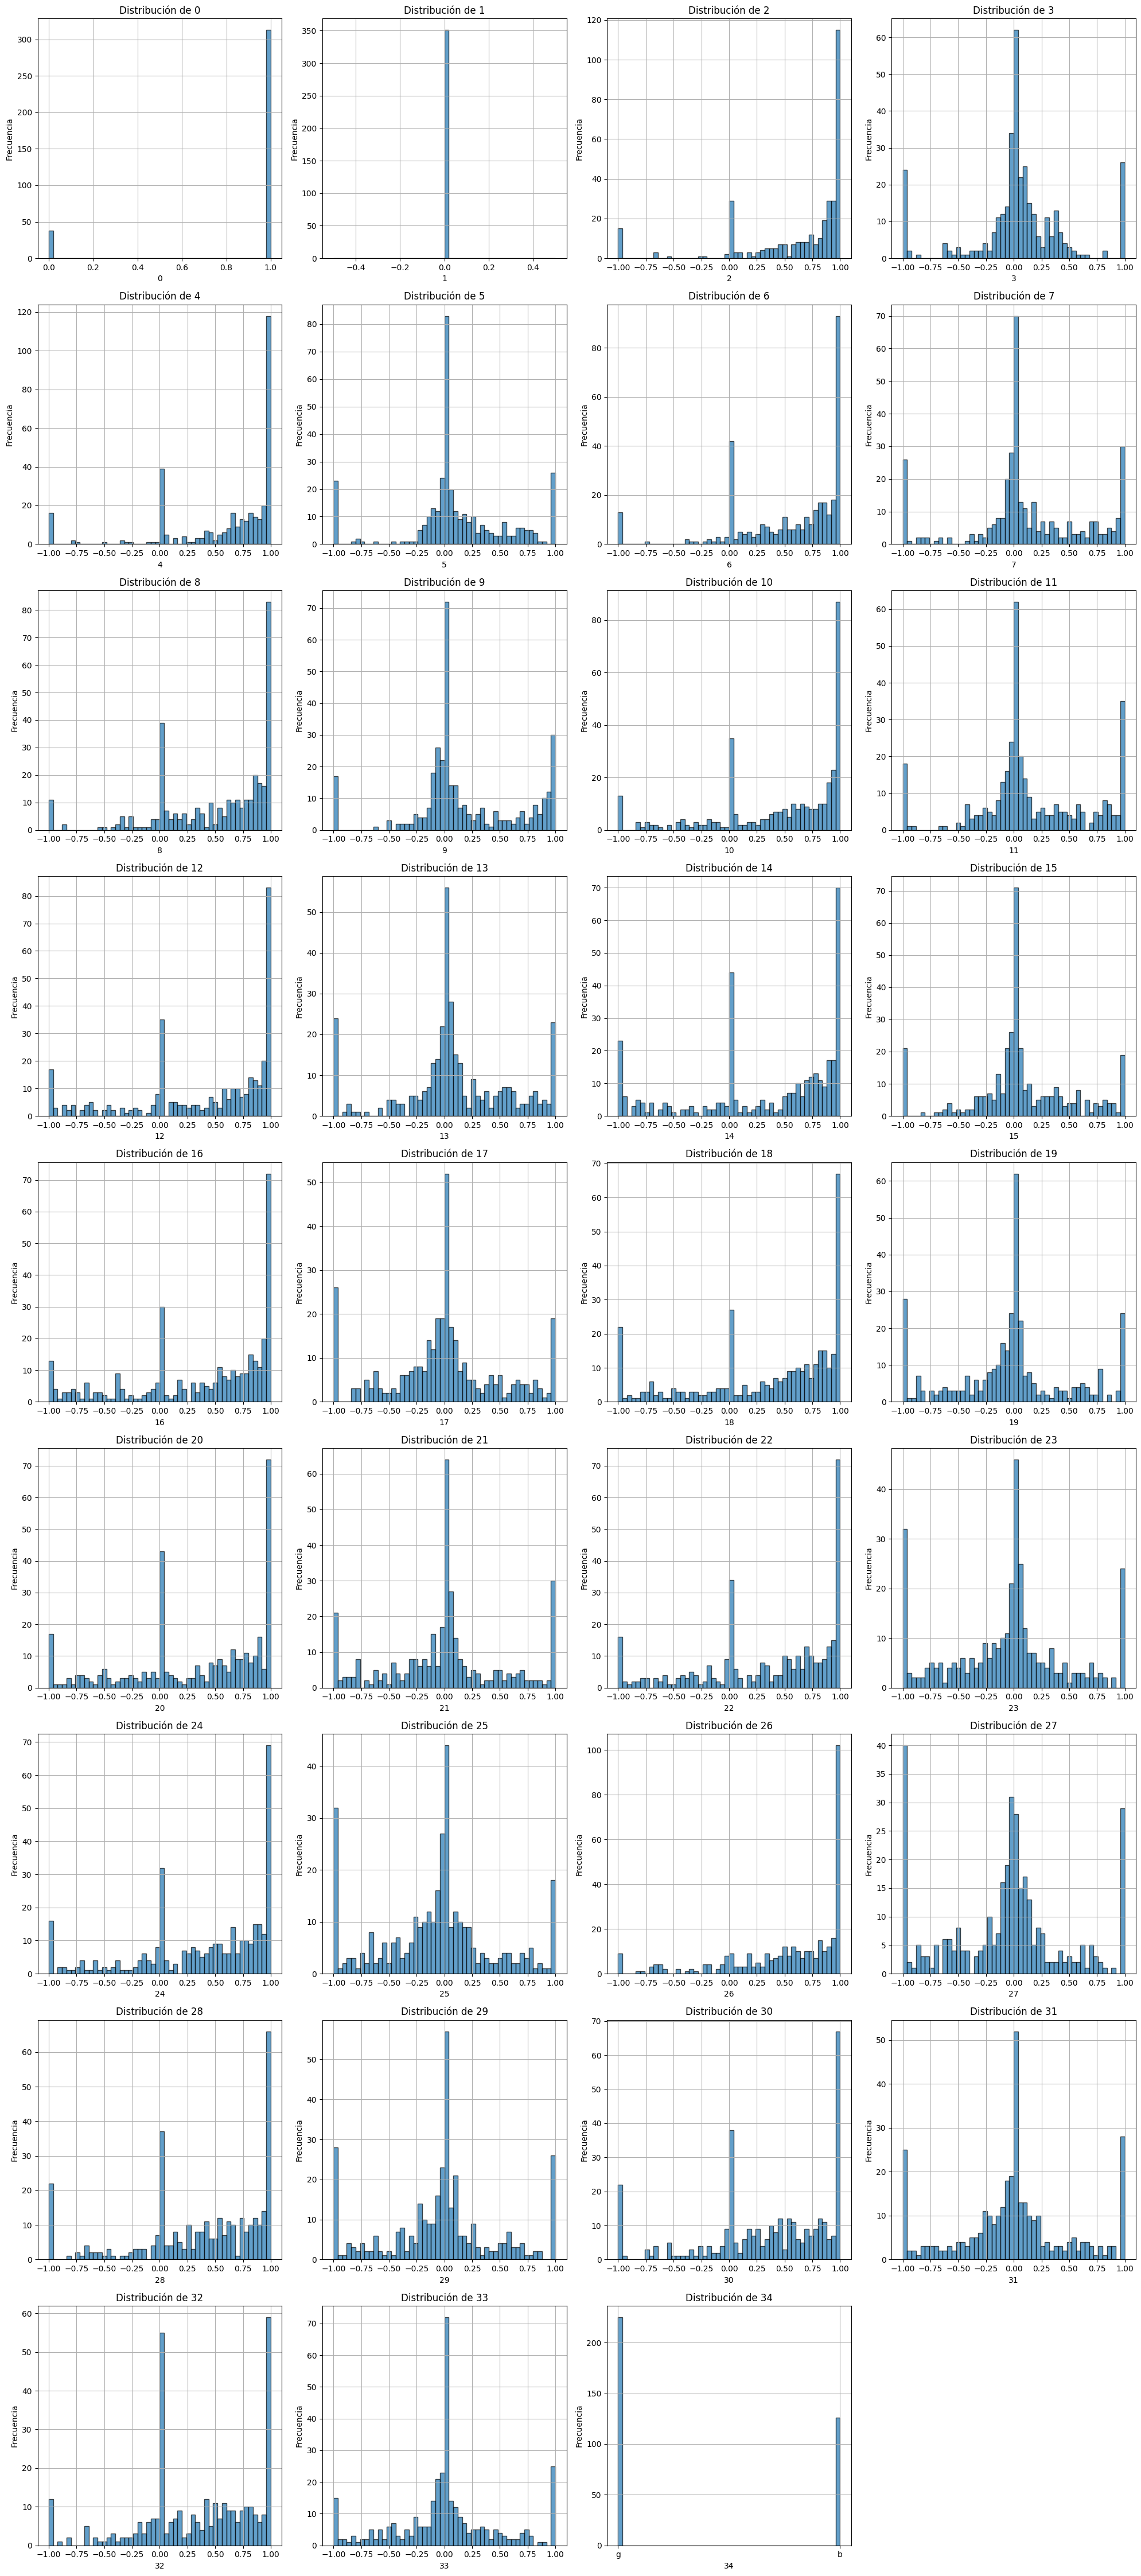

In [5]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = data.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(data[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### data = data.drop(1, axis=1)
data.info()

In [6]:
import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch.nn import Linear, ReLU, Sigmoid, Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_, xavier_uniform_
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import vstack
import matplotlib.pyplot as plt

# Detectar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Separar características y etiquetas
X = data.drop(columns=[34]).values  
y = LabelEncoder().fit_transform(data[34]) 
y = y.reshape(-1, 1) 

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar correctamente SOLO el entrenamiento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Convertir datos a tensores
X_train_tensor = Tensor(X_train).to(device)
y_train_tensor = Tensor(y_train).to(device)
X_test_tensor  = Tensor(X_test).to(device)
y_test_tensor  = Tensor(y_test).to(device)

# Crear DataLoader
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dl  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definir modelo
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()

        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()

        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    def forward(self, X):
        X = self.act1(self.hidden1(X))
        X = self.act2(self.hidden2(X))
        X = self.act3(self.hidden3(X))
        return X

# Entrenamiento con historial
EPOCHS = 50
loss_history = []
acc_history = []

def train_model(train_dl, test_dl, model):
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    model.to(device)

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0.0

        for inputs, targets in train_dl:
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Guardar pérdida promedio
        epoch_loss = total_loss / len(train_dl)
        loss_history.append(epoch_loss)

        # Accuracy en test
        acc = evaluate_model(test_dl, model)
        acc_history.append(acc)

        print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {epoch_loss:.4f} - Acc: {acc:.4f}")

# Evaluación
def evaluate_model(test_dl, model):
    model.eval()
    predictions, actuals = [], []

    with torch.no_grad():
        for inputs, targets in test_dl:
            yhat = model(inputs)
            yhat = yhat.cpu().numpy()
            actual = targets.cpu().numpy()
            yhat = yhat.round()

            predictions.append(yhat)
            actuals.append(actual)

    predictions, actuals = vstack(predictions), vstack(actuals)
    acc = accuracy_score(actuals, predictions)
    return acc

# Instanciar y entrenar
model = MLP(X_train.shape[1])
train_model(train_dl, test_dl, model)

# Accuracy final
acc = evaluate_model(test_dl, model)
print(f"Accuracy en el conjunto de prueba: {acc:.3f}")


Usando dispositivo: cuda
Epoch 1/50 - Loss: 0.7214 - Acc: 0.7746
Epoch 2/50 - Loss: 0.6445 - Acc: 0.8169
Epoch 3/50 - Loss: 0.5604 - Acc: 0.8451
Epoch 4/50 - Loss: 0.5014 - Acc: 0.8592
Epoch 5/50 - Loss: 0.4786 - Acc: 0.8732
Epoch 6/50 - Loss: 0.4345 - Acc: 0.8732
Epoch 7/50 - Loss: 0.4224 - Acc: 0.8873
Epoch 8/50 - Loss: 0.4121 - Acc: 0.8873
Epoch 9/50 - Loss: 0.3855 - Acc: 0.8873
Epoch 10/50 - Loss: 0.3488 - Acc: 0.9014
Epoch 11/50 - Loss: 0.3425 - Acc: 0.9014
Epoch 12/50 - Loss: 0.3303 - Acc: 0.9155
Epoch 13/50 - Loss: 0.3441 - Acc: 0.9155
Epoch 14/50 - Loss: 0.3085 - Acc: 0.9014
Epoch 15/50 - Loss: 0.2887 - Acc: 0.9014
Epoch 16/50 - Loss: 0.2684 - Acc: 0.8873
Epoch 17/50 - Loss: 0.2681 - Acc: 0.8873
Epoch 18/50 - Loss: 0.2801 - Acc: 0.8873
Epoch 19/50 - Loss: 0.2759 - Acc: 0.8873
Epoch 20/50 - Loss: 0.2681 - Acc: 0.9014
Epoch 21/50 - Loss: 0.2442 - Acc: 0.9014
Epoch 22/50 - Loss: 0.2256 - Acc: 0.8873
Epoch 23/50 - Loss: 0.2174 - Acc: 0.8873
Epoch 24/50 - Loss: 0.2280 - Acc: 0.8873


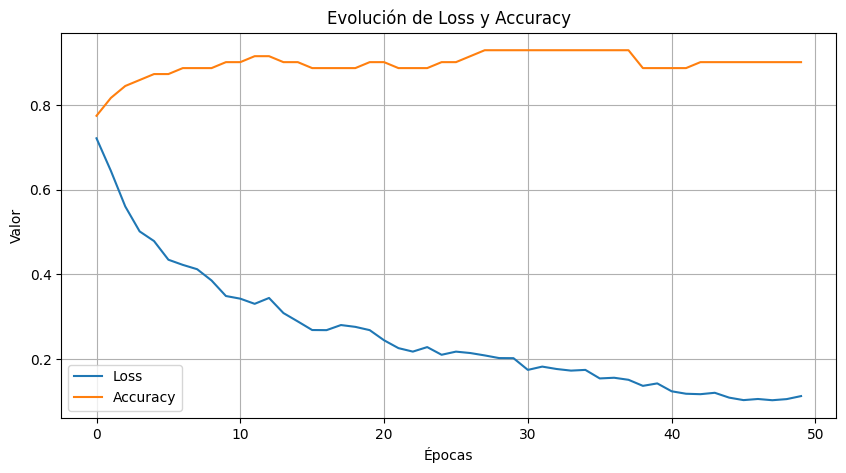

In [7]:
plt.figure(figsize=(10,5))
plt.plot(loss_history, label="Loss")
plt.plot(acc_history, label="Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Valor")
plt.title("Evolución de Loss y Accuracy")
plt.legend()
plt.grid()
plt.show()
